In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import os
from tensorflow.keras.applications.xception import Xception


2.0.0


In [2]:
import tensorflow as tf

In [3]:
logs = 'xception'
checkpints_dir = 'checkpoints'

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2"

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [6]:
def check_rootfolders():
    """Create log and model folder"""
    folders_util = [checkpints_dir, 'logs']
    for folder in folders_util:
        if not os.path.exists(folder):
            print('creating folder ' + folder)
            os.mkdir(folder)

check_rootfolders()

In [7]:

# train_datagen = ImageDataGenerator(rescale=1/255)
# val_datagen = ImageDataGenerator(rescale=1/255)

# normalize images
train_datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization= True)
    
validation_datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization= True)
target_size = (256,256)

In [8]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'train.csv'))
df

,Unnamed: 0,filename,label
0,1038,0c2e9b99-9a8f-4b44-854e-acd181a0208c.jpg,0
1,2922,34fdff09-5bc2-4df5-b8cf-3c37662037c8.jpg,2
2,1174,0ebc8268-df3d-45d8-8ee7-b34880c62830.jpg,2
3,341,06f1d0a2-d8c5-4229-9944-59da85c96b81.jpg,0
4,280,06951c33-b247-4daf-a087-cc082f83238b.jpg,0
...,...,...,...
940,1200,0f8c91da-7e03-480e-8760-1604b1d53c97.jpg,0
941,1151,0dbb83c1-2214-4152-ac69-d1e7e25453cb.jpg,0
942,499,081e308c-0134-4ba3-b745-f632e37a83a1.jpg,0
943,663,095d6b7c-fa53-4f06-90b9-5c5f76038f04.jpg,2


In [9]:
val_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'test.csv'))
val_df

,Unnamed: 0,filename,label
0,3923,3b8d4df3-3950-412b-9206-1cbb57c7943e.jpg,2
1,613,0902e0fc-fcf3-40b5-ac04-c3ecc14c2355.jpg,2
2,1082,0c9be296-285f-44dc-8599-afde00848e9d.jpg,0
3,3603,39693e31-b11e-4cd5-a626-2862cb0ede1d.jpg,2
4,2700,339d0607-e869-4869-ac6d-379172682713.jpg,2
...,...,...,...
100,975,0bcfe7ee-ada5-48de-990b-2a2fd6c6ed15.jpg,2
101,268,06737bed-8dc1-47d9-8c30-324282dcc84d.jpg,2
102,3815,3adf7f71-3ded-406d-a08c-a61d152f78dc.jpg,2
103,2908,34e19eb5-78d1-42b9-bc47-b043d97feefb.jpg,2


In [10]:
batch_size=128

In [11]:
# train_data_gen = train_datagen.flow_from_directory(train_path,
#                                                target_size=target_size,
#                                                batch_size=32,
#                                                class_mode='categorical')

image_dir =os.path.join(os.getcwd(), 'data','train')
train_generator = train_datagen.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col='filename',
            y_col='label',
            class_mode="raw",
            batch_size=batch_size,
            shuffle=True,
            #seed=seed,
            target_size=target_size)

val_image_dir =os.path.join(os.getcwd(), 'data','test')
val_generator = train_datagen.flow_from_dataframe(
            dataframe=val_df,
            directory=image_dir,
            x_col='filename',
            y_col='label',
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            #seed=seed,
            target_size=target_size)

Found 945 validated image filenames.
Found 26 validated image filenames.


/home/ramkik/anaconda3/envs/tf/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 79 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [12]:
image_dir

'/lusnlsas/ramkik_data/covid19/covid/data/train'

In [13]:
batch = train_generator.next()

In [14]:
#batch[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


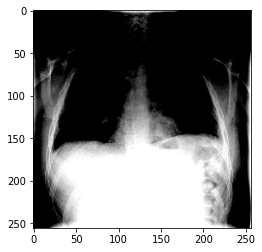

In [15]:
x, y = train_generator.__getitem__(0)
plt.imshow(x[0]);

In [16]:
#train_generator.labels

In [17]:
df.groupby('label').count().values[:,0]

array([408, 114, 423])

In [18]:
classes = ['normal', 'COVID-19', 'other_pneumonia']

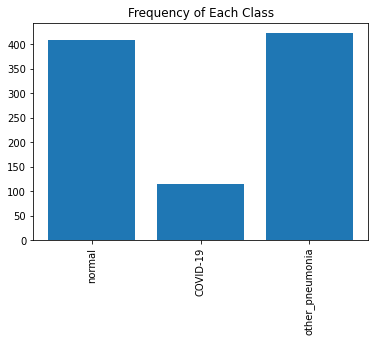

In [19]:
plt.xticks(rotation=90)
plt.bar(x=classes, height=df.groupby('label').count().values[:,0])
plt.title("Frequency of Each Class")
plt.show()

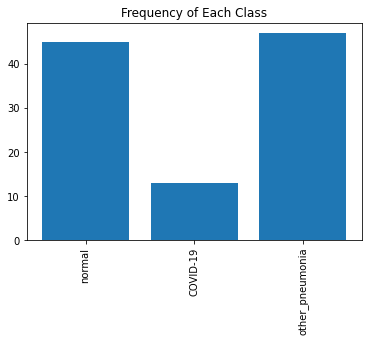

In [20]:
plt.xticks(rotation=90)
plt.bar(x=classes, height=val_df.groupby('label').count().values[:,0])
plt.title("Frequency of Each Class")
plt.show()

In [21]:
input_shape = (256,256,3)


In [1]:

def getModel():
    
    pretrained_model = Xception(input_shape = input_shape,
                weights = 'imagenet',
                layers=tf.keras.layers,
                include_top = False)
    pretrained_model.trainable = False
    pretrained_model.summary()
    
    for layer in pretrained_model.layers:
        layer.trainable = False
    
    model = Sequential()

    model.add(pretrained_model)

    model.add(Flatten())

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(3))
    model.add(Activation('softmax'))

    model.summary()
    return model

In [2]:

# Define early stopping and model checkpoint for optimizing epoch number and saving the best model

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
patience=20)

mc = ModelCheckpoint(os.path.join(os.getcwd(), checkpints_dir, 'weights.{epoch:02d}-{val_loss:.2f}.hdf5'), monitor='val_accuracy', mode='max', verbose=1, save_best_only=False)
tb = TensorBoard(log_dir='./logs/'+logs)

NameError: name 'os' is not defined

In [24]:
mirrored_strategy = tf.distribute.MirroredStrategy()


In [25]:
train_generator.samples

945

In [26]:
train_generator.batch_size

128

In [27]:
with mirrored_strategy.scope():
    model = getModel()
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    epochs = 20
    history = model.fit(train_generator,
                                  steps_per_epoch=train_generator.samples/train_generator.batch_size,
                                  epochs=epochs,
                                  validation_data=val_generator,
                                  validation_steps=val_generator.samples/val_generator.batch_size,
                                  callbacks=[es,mc,tb] )

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [30]:
!mkdir models

mkdir: cannot create directory ‘models’: File exists


In [37]:
# Fetch the Keras session and save the model
# The signature definition is defined by the input and output tensors,
# and stored with the default serving key

MODEL_DIR = 'models'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
os.environ['export_path'] = export_path
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

tf.saved_model.save(
    model,
    export_path)

print('\nSaved model:')
!ls -l {export_path}

export_path = models/1


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: models/1/assets

Saved model:
total 9
drwxr-xr-x 2 ramkik bioinfo    4096 May  2 22:53 assets
-rw-r--r-- 1 ramkik bioinfo 4182103 May  2 22:53 saved_model.pb
drwxr-xr-x 2 ramkik bioinfo    4096 May  2 22:53 variables


In [38]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['xception_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 256, 256, 3)
        name: serving_default_xception_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['activation_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 3)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
